In [1]:
import cv2
import matplotlib.pyplot as plt

from config import DATA_DIR

In [2]:
IMAGE_NAME = "317947"
IMAGE_PATH = DATA_DIR.joinpath(f"{IMAGE_NAME}.jpg")

In [3]:
image = cv2.imread(filename=str(IMAGE_PATH))
image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2RGB)
print(f"Loaded image {IMAGE_PATH} with shape: {image.shape}")

Loaded image C:\Users\punit\projects\research\clotscape\data\317947.jpg with shape: (742, 932, 3)


In [4]:
def save_image(image, filename):
    if len(image.shape) == 2:  # Grayscale image
        plt.figure()
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(filename, bbox_inches='tight', pad_inches=0, facecolor='white', dpi=300)
        plt.close()
    elif image.shape[2] == 3:  # RGB image
        plt.figure()
        plt.imshow(image)
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(filename, bbox_inches='tight', pad_inches=0, facecolor='white', dpi=300)
        plt.close()
    else:  # BGR image (assuming OpenCV format)
        image = image.astype(np.float32)
        plt.figure()
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(filename, bbox_inches='tight', pad_inches=0, facecolor='white', dpi=300)
        plt.close()

## Denoising

In [5]:
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet


def gaussian_filtering(image, kernel_size=(5, 5), sigma=0):
    return cv2.GaussianBlur(image, kernel_size, sigma)

def median_filtering(image, kernel_size=5):
    return cv2.medianBlur(image, kernel_size)

def non_local_means_denoising(image, h=10, search_window=21, block_size=7):
    return cv2.fastNlMeansDenoisingColored(image, None, h, h, search_window, block_size)

def tv_denoising(image, weight=0.1):
    denoised = denoise_tv_chambolle(image, weight=weight)
    return denoised

def bilateral_denoising(image, win_size=5, sigma_color=0.1, sigma_spatial=15):
    denoised = denoise_bilateral(image, win_size=win_size, sigma_color=sigma_color, sigma_spatial=sigma_spatial, channel_axis=2)
    return denoised

def wavelet_denoising(image):
    denoised = denoise_wavelet(image, method="BayesShrink", mode="soft", rescale_sigma=True)
    return denoised

In [6]:
# Apply denoising methods
gaussian_denoised = gaussian_filtering(image, kernel_size=(5, 5), sigma=1.5)
median_denoised = median_filtering(image, kernel_size=5)
nlm_denoised = non_local_means_denoising(image, h=10, search_window=21, block_size=7)
tv_denoised = tv_denoising(image, weight=0.1)
bilateral_denoised = bilateral_denoising(image, win_size=5, sigma_color=0.1, sigma_spatial=15)
wavelet_denoised = wavelet_denoising(image)

In [7]:
DENOISE_DIR = DATA_DIR.joinpath(f"denoise")
DENOISE_DIR.mkdir(exist_ok=True)

save_image(gaussian_denoised, str(DENOISE_DIR / f"{IMAGE_NAME}_gaussian_denoised.jpg"))
save_image(median_denoised, str(DENOISE_DIR / f"{IMAGE_NAME}_median_denoised.jpg"))
save_image(nlm_denoised, str(DENOISE_DIR / f"{IMAGE_NAME}_nlm_denoised.jpg"))
save_image(tv_denoised, str(DENOISE_DIR / f"{IMAGE_NAME}_tv_denoised.jpg"))
save_image(bilateral_denoised, str(DENOISE_DIR / f"{IMAGE_NAME}_bilateral_denoised.jpg"))
save_image(wavelet_denoised, str(DENOISE_DIR / f"{IMAGE_NAME}_wavelet_denoised.jpg"))
print(f"Denoised images saved in {DENOISE_DIR}")

Denoised images saved in E:\projects\vision\clotscape\data\denoise


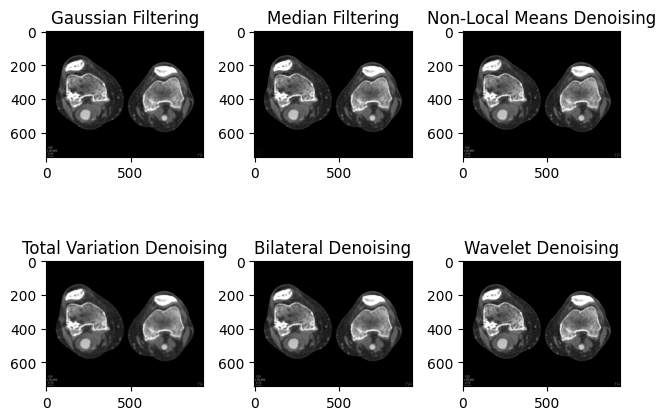

In [8]:
# Display the results
plt.figure()
plt.subplot(2, 3, 1), plt.imshow(gaussian_denoised), plt.title("Gaussian Filtering")
plt.subplot(2, 3, 2), plt.imshow(median_denoised), plt.title("Median Filtering")
plt.subplot(2, 3, 3), plt.imshow(nlm_denoised), plt.title("Non-Local Means Denoising")
plt.subplot(2, 3, 4), plt.imshow(tv_denoised), plt.title("Total Variation Denoising")
plt.subplot(2, 3, 5), plt.imshow(bilateral_denoised), plt.title("Bilateral Denoising")
plt.subplot(2, 3, 6), plt.imshow(wavelet_denoised), plt.title("Wavelet Denoising")

plt.tight_layout()
plt.show()

In [9]:
import matplotlib.animation as animation
import numpy as np
from matplotlib import rc
import math

def round_sig(x, sig=2):
    return round(x, -int(math.floor(math.log10(abs(x)))) + (sig - 1))

Animations saved in E:\projects\vision\clotscape\data\denoise


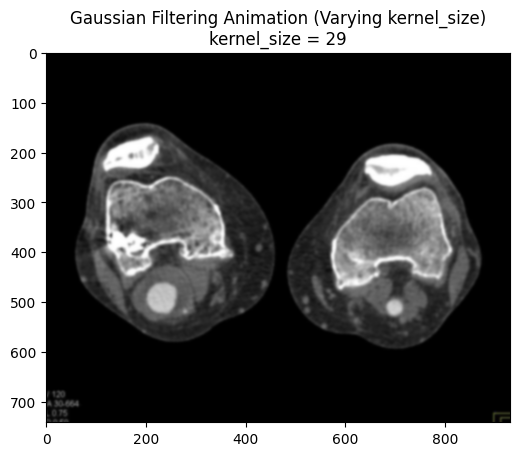

In [10]:
# Gaussian Filtering Animation
fig, ax = plt.subplots()
im = ax.imshow(image, cmap='gray', vmin=0, vmax=255)

sigma_range = np.linspace(0.1, 5.0, 100)

def update_frame_gaussian_sigma(frame_idx):
    sigma = sigma_range[frame_idx]
    rounded_sigma = round_sig(sigma, sig=2)
    denoised_image = gaussian_filtering(image, kernel_size=(9, 9), sigma=sigma)
    im.set_data(denoised_image)
    ax.set_title(f"Gaussian Filtering Animation (Varying sigma)\nsigma = {rounded_sigma}")
    return [im]

num_frames = len(sigma_range)
ani_gaussian = animation.FuncAnimation(fig, update_frame_gaussian_sigma, frames=num_frames, blit=True, interval=(1000 // num_frames))

rc('animation', writer='pillow')
ani_gaussian.save(str(DENOISE_DIR / "gaussian_denoising_sigma.gif"), writer='pillow', fps=num_frames)


kernel_size_range = np.arange(3, 30, 2)

def update_frame_gaussian_kernel_size(frame_idx):
    kernel_size = kernel_size_range[frame_idx]
    denoised_image = gaussian_filtering(image, kernel_size=(kernel_size, kernel_size), sigma=2.0)
    im.set_data(denoised_image)
    ax.set_title(f"Gaussian Filtering Animation (Varying kernel_size)\nkernel_size = {kernel_size}")
    return [im]

num_frames = len(kernel_size_range)
ani_gaussian_kernel_size = animation.FuncAnimation(fig, update_frame_gaussian_kernel_size, frames=num_frames, blit=True, interval=(1000 // num_frames))

rc('animation', writer='pillow')
ani_gaussian_kernel_size.save(str(DENOISE_DIR / "gaussian_denoising_kernel_size.gif"), writer='pillow', fps=num_frames)


print(f"Animations saved in {DENOISE_DIR}")

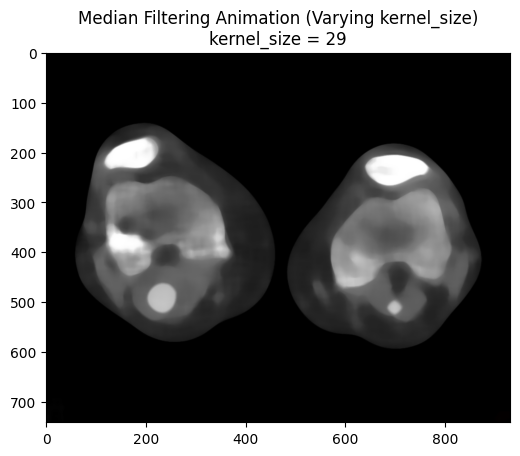

In [11]:
# Median Filtering Animation
fig, ax = plt.subplots()
im = ax.imshow(image, cmap='gray', vmin=0, vmax=255)

kernel_size_range = np.arange(3, 30, 2)

def update_frame_median(frame_idx):
    kernel_size = kernel_size_range[frame_idx]
    denoised_image = median_filtering(image, kernel_size=kernel_size)
    im.set_data(denoised_image)
    ax.set_title(f"Median Filtering Animation (Varying kernel_size)\nkernel_size = {kernel_size}")
    return [im]

num_frames = len(kernel_size_range)
ani_median = animation.FuncAnimation(fig, update_frame_median, frames=num_frames, blit=True, interval=(1000 // num_frames))

rc('animation', writer='pillow')
ani_median.save(str(DENOISE_DIR / "median_denoising_kernel_size.gif"), writer='pillow', fps=num_frames)

Animations saved in E:\projects\vision\clotscape\data\denoise


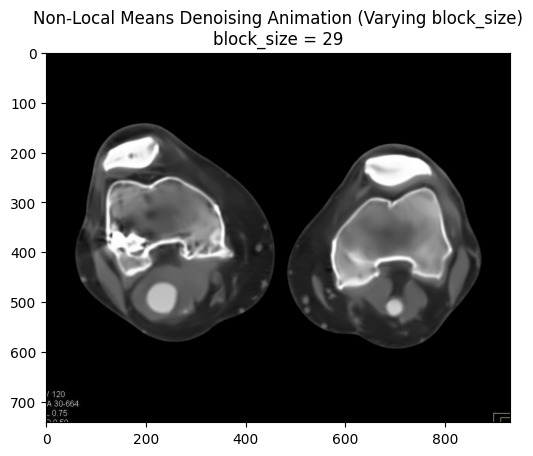

In [12]:
# Non-Local Means Denoising Animation
fig, ax = plt.subplots()
im = ax.imshow(image, cmap='gray', vmin=0, vmax=255)

h_range = np.linspace(3, 50, 100)

def update_frame_nlm_h(frame_idx):
    h = h_range[frame_idx]
    rounded_h = round_sig(h, sig=2)
    denoised_image = non_local_means_denoising(image, h=h, search_window=21, block_size=7)
    im.set_data(denoised_image)
    ax.set_title(f"Non-Local Means Denoising Animation (Varying h)\nh = {rounded_h}")
    return [im]

num_frames = len(h_range)
ani_nlm = animation.FuncAnimation(fig, update_frame_nlm_h, frames=num_frames, blit=True, interval=(1000 // num_frames))

rc('animation', writer='pillow')
ani_nlm.save(str(DENOISE_DIR / "nlm_denoising_h.gif"), writer='pillow', fps=num_frames)


search_window_range = np.arange(3, 30, 2)

def update_frame_nlm_search_window(frame_idx):
    search_window = search_window_range[frame_idx]
    denoised_image = non_local_means_denoising(image, h=10, search_window=search_window, block_size=7)
    im.set_data(denoised_image)
    ax.set_title(f"Non-Local Means Denoising Animation (Varying search_window)\nsearch_window = {search_window}")
    return [im]

num_frames = len(search_window_range)
ani_nlm_search_window = animation.FuncAnimation(fig, update_frame_nlm_search_window, frames=num_frames, blit=True, interval=(1000 // num_frames))

rc('animation', writer='pillow')
ani_nlm_search_window.save(str(DENOISE_DIR / "nlm_denoising_search_window.gif"), writer='pillow', fps=num_frames)


block_size_range = np.arange(3, 30, 2)

def update_frame_nlm_block_size(frame_idx):
    block_size = block_size_range[frame_idx]
    denoised_image = non_local_means_denoising(image, h=10, search_window=21, block_size=block_size)
    im.set_data(denoised_image)
    ax.set_title(f"Non-Local Means Denoising Animation (Varying block_size)\nblock_size = {block_size}")
    return [im]

num_frames = len(block_size_range)
ani_nlm_block_size = animation.FuncAnimation(fig, update_frame_nlm_block_size, frames=num_frames, blit=True, interval=(1000 // num_frames))

rc('animation', writer='pillow')
ani_nlm_block_size.save(str(DENOISE_DIR / "nlm_denoising_block_size.gif"), writer='pillow', fps=num_frames)


print(f"Animations saved in {DENOISE_DIR}")

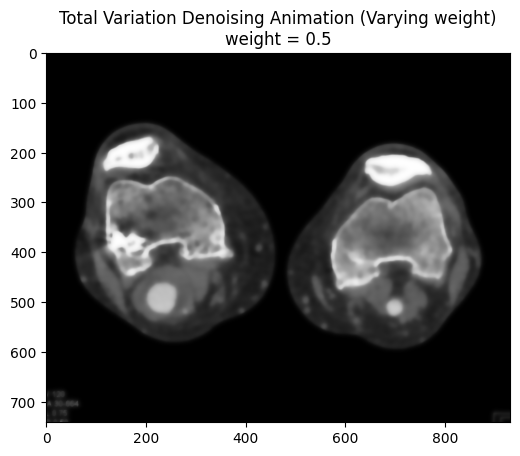

In [13]:
# Total Variation Denoising Animation

fig, ax = plt.subplots()
im = ax.imshow(image, cmap='gray', vmin=0, vmax=255)

weight_range = np.linspace(0.01, 0.5, 100)

def update_frame_tv_weight(frame_idx):
    weight = weight_range[frame_idx]
    rounded_weight = round_sig(weight, sig=2)
    denoised_image = tv_denoising(image, weight=weight)
    im.set_data(denoised_image)
    ax.set_title(f"Total Variation Denoising Animation (Varying weight)\nweight = {rounded_weight}")
    return [im]

num_frames = len(weight_range)
ani_tv = animation.FuncAnimation(fig, update_frame_tv_weight, frames=num_frames, blit=True, interval=(1000 // num_frames))

rc('animation', writer='pillow')
ani_tv.save(str(DENOISE_DIR / "tv_denoising_weight.gif"), writer='pillow', fps=num_frames)

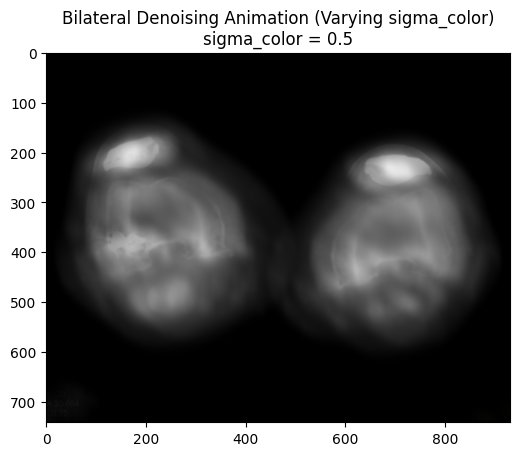

In [14]:
# Bilateral Denoising Animation

fig, ax = plt.subplots()
im = ax.imshow(image, cmap='gray', vmin=0, vmax=255)

sigma_color_range = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.45, 0.5]

def update_frame_bilateral_sigma_color(frame_idx):
    sigma_color = sigma_color_range[frame_idx]
    rounded_sigma_color = round_sig(sigma_color, sig=2)
    denoised_image = bilateral_denoising(image, win_size=None, sigma_color=sigma_color, sigma_spatial=15)
    im.set_data(denoised_image)
    ax.set_title(f"Bilateral Denoising Animation (Varying sigma_color)\nsigma_color = {rounded_sigma_color}")
    return [im]

num_frames = len(sigma_color_range)
ani_bilateral_sigma_color = animation.FuncAnimation(fig, update_frame_bilateral_sigma_color, frames=num_frames, blit=True, interval=(1000 // num_frames))

rc('animation', writer='pillow')
ani_bilateral_sigma_color.save(str(DENOISE_DIR / "bilateral_denoising_sigma_color.gif"), writer='pillow', fps=num_frames)

In [15]:
sigma_spatial_range = np.linspace(5, 50, 10)

def update_frame_bilateral_sigma_spatial(frame_idx):
    sigma_spatial = sigma_spatial_range[frame_idx]
    rounded_sigma_spatial = round_sig(sigma_spatial, sig=2)
    denoised_image = bilateral_denoising(image, win_size=5, sigma_color=0.1, sigma_spatial=sigma_spatial)
    im.set_data(denoised_image)
    ax.set_title(f"Bilateral Denoising Animation (Varying sigma_spatial)\nsigma_spatial = {rounded_sigma_spatial}")
    return [im]

num_frames = len(sigma_spatial_range)
ani_bilateral_sigma_spatial = animation.FuncAnimation(fig, update_frame_bilateral_sigma_spatial, frames=num_frames, blit=True, interval=(1000 // num_frames))

rc('animation', writer='pillow')
ani_bilateral_sigma_spatial.save(str(DENOISE_DIR / "bilateral_denoising_sigma_spatial.gif"), writer='pillow', fps=num_frames)

print(f"Animations saved in {DENOISE_DIR}")

Animations saved in E:\projects\vision\clotscape\data\denoise


# Normalization

In [7]:
from skimage.exposure import equalize_adapthist

def intensity_windowing(image, window_level, window_width):
    window_min = window_level - (window_width // 2)
    window_max = window_level + (window_width // 2)
    image_windowed = np.clip(image, window_min, window_max)
    image_windowed = (image_windowed - window_min) / (window_max - window_min) * 255
    return image_windowed.astype(np.uint8)

def z_score_normalization(image, std: float = 1):
    mean = np.mean(image)
    normalized = (image - mean) / (np.std(image) * std)
    return normalized

def percentile_normalization(image, lower_percentile=5, upper_percentile=95):
    lower_value = np.percentile(image, lower_percentile)
    upper_value = np.percentile(image, upper_percentile)
    normalized = (image - lower_value) / (upper_value - lower_value)
    normalized = np.clip(normalized, 0, 1)
    return normalized

def clahe_normalization(image, kernel_size=None, clip_limit=0.01, nbins=256):
    normalized = equalize_adapthist(image, kernel_size=kernel_size, clip_limit=clip_limit, nbins=nbins)
    return normalized

In [25]:
windowed_image = intensity_windowing(image, window_level=80, window_width=120)
z_score_normalized_image = z_score_normalization(image, std=2.5)
percentile_normalized_image = percentile_normalization(image, lower_percentile=2, upper_percentile=98)
clahe_normalized_image = clahe_normalization(image, kernel_size=(8, 8), clip_limit=0.01, nbins=64)

In [26]:
# Save normalized images
NORMALIZE_DIR = DATA_DIR.joinpath(f"normalize")
NORMALIZE_DIR.mkdir(exist_ok=True)
save_image(windowed_image, str(NORMALIZE_DIR / f"{IMAGE_NAME}_windowed.jpg"))
save_image(z_score_normalized_image, str(NORMALIZE_DIR / f"{IMAGE_NAME}_z_score_normalized.jpg"))
save_image(percentile_normalized_image, str(NORMALIZE_DIR / f"{IMAGE_NAME}_percentile_normalized.jpg"))
save_image(clahe_normalized_image, str(NORMALIZE_DIR / f"{IMAGE_NAME}_clahe_normalized.jpg"))
print(f"Normalized images saved in {NORMALIZE_DIR}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Normalized images saved in C:\Users\punit\projects\research\clotscape\data\normalize


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<Axes: title={'center': 'CLAHE Normalization'}>,
 Text(0.5, 1.0, 'CLAHE Normalization'))

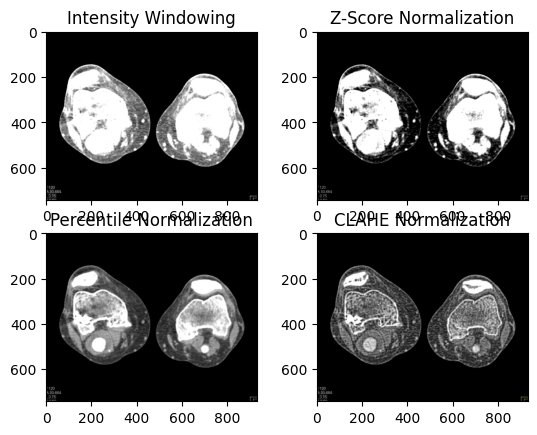

In [20]:
# Display the results
plt.figure()
plt.subplot(2, 2, 1), plt.imshow(windowed_image, cmap='gray'), plt.title("Intensity Windowing")
plt.subplot(2, 2, 2), plt.imshow(z_score_normalized_image, cmap='gray'), plt.title("Z-Score Normalization")
plt.subplot(2, 2, 3), plt.imshow(percentile_normalized_image, cmap='gray'), plt.title("Percentile Normalization")
plt.subplot(2, 2, 4), plt.imshow(clahe_normalized_image, cmap='gray'), plt.title("CLAHE Normalization")

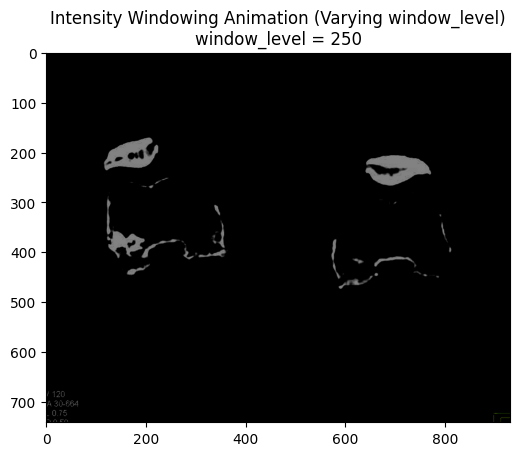

In [22]:
# Intensity Windowing Animation
fig, ax = plt.subplots()
im = ax.imshow(image, cmap='gray', vmin=0, vmax=255)

window_level_range = np.arange(1, 255, 1)
window_width = 80

def update_frame_window_level(frame_idx):
    window_level = window_level_range[frame_idx]
    rounded_window_level = round_sig(window_level, sig=2)
    windowed_image = intensity_windowing(image, window_level=window_level, window_width=window_width)
    im.set_data(windowed_image)
    ax.set_title(f"Intensity Windowing Animation (Varying window_level)\nwindow_level = {rounded_window_level}")
    return [im]

num_frames = len(window_level_range)
ani_window_level = animation.FuncAnimation(fig, update_frame_window_level, frames=num_frames, blit=True, interval=(1000 // num_frames))

rc('animation', writer='pillow')
ani_window_level.save(str(NORMALIZE_DIR / "window_level.gif"), writer='pillow', fps=num_frames)


window_level = 80
window_width_range = np.arange(1, 255, 1)

def update_frame_window_width(frame_idx):
    window_width = window_width_range[frame_idx]
    rounded_window_width = round_sig(window_width, sig=2)
    windowed_image = intensity_windowing(image, window_level=window_level, window_width=window_width)
    im.set_data(windowed_image)
    ax.set_title(f"Intensity Windowing Animation (Varying window_width)\nwindow_width = {rounded_window_width}")
    return [im]

num_frames = len(window_width_range)
ani_window_width = animation.FuncAnimation(fig, update_frame_window_width, frames=num_frames, blit=True, interval=(1000 // num_frames))

rc('animation', writer='pillow')
ani_window_width.save(str(NORMALIZE_DIR / "window_width.gif"), writer='pillow', fps=num_frames)

print(f"Animations saved in {NORMALIZE_DIR}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

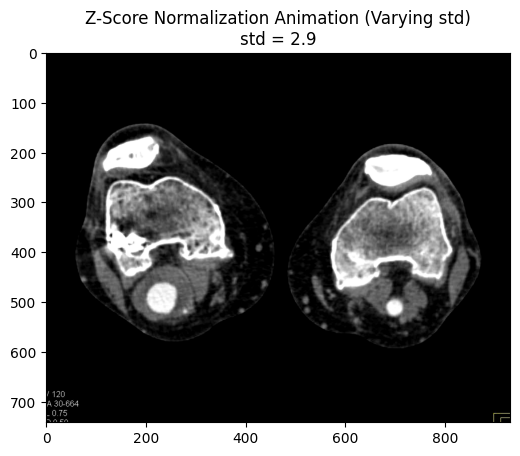

In [13]:
# Z-Score Normalization Animation
fig, ax = plt.subplots()
im = ax.imshow(image, cmap='gray', vmin=0, vmax=255)

std_range = np.arange(0.1, 3.0, 0.1)

def update_frame_z_score_std(frame_idx):
    std = std_range[frame_idx]
    rounded_std = round_sig(std, sig=2)
    normalized_image = z_score_normalization(image, std=std)
    im.set_data(normalized_image)
    ax.set_title(f"Z-Score Normalization Animation (Varying std)\nstd = {rounded_std}")
    return [im]

num_frames = len(std_range)
ani_z_score = animation.FuncAnimation(fig, update_frame_z_score_std, frames=num_frames, blit=True, interval=(2000 // num_frames))

rc('animation', writer='pillow')
ani_z_score.save(str(NORMALIZE_DIR / "z_score.gif"), writer='pillow', fps=(num_frames // 2))

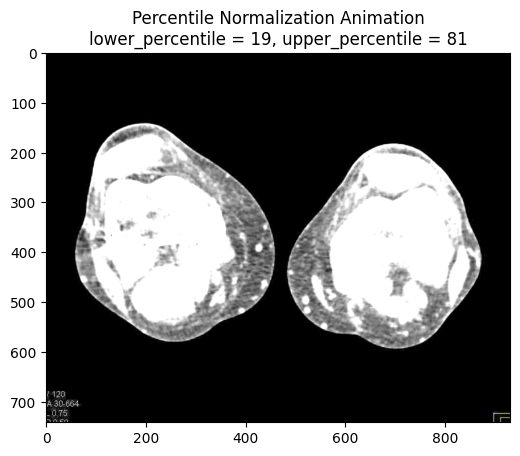

In [22]:
# Percentile Normalization Animation
fig, ax = plt.subplots()
im = ax.imshow(image, cmap='gray', vmin=0, vmax=255)

pct_norm_range = np.arange(1, 20, 1) # Percentile range (0-range, range-100)

def update_frame_percentile(frame_idx):
    lower_percentile = pct_norm_range[frame_idx]
    upper_percentile = 100 - lower_percentile
    normalized_image = percentile_normalization(image, lower_percentile=lower_percentile, upper_percentile=upper_percentile)
    im.set_data(normalized_image)
    ax.set_title(f"Percentile Normalization Animation\nlower_percentile = {lower_percentile}, upper_percentile = {upper_percentile}")
    return [im]

num_frames = len(pct_norm_range)
ani_percentile = animation.FuncAnimation(fig, update_frame_percentile, frames=num_frames, blit=True, interval=(2000 // num_frames))

rc('animation', writer='pillow')
ani_percentile.save(str(NORMALIZE_DIR / "percentile.gif"), writer='pillow', fps=(num_frames/2))

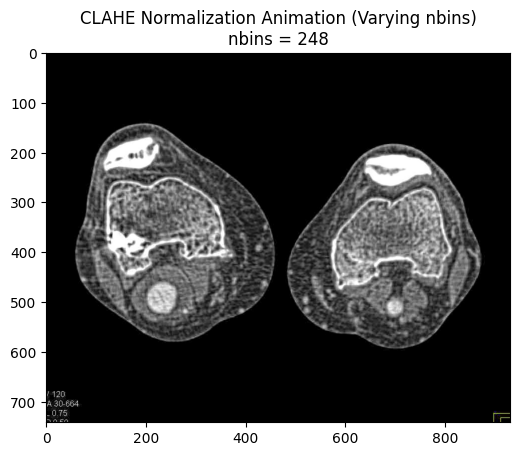

In [27]:
# CLAHE Normalization Animation
# Vary kernel_size, clip_limit, and nbins

fig, ax = plt.subplots()
im = ax.imshow(image, cmap='gray', vmin=0, vmax=255)

kernel_size_range = np.arange(3, 30, 2)

def update_frame_clahe_kernel_size(frame_idx):
    kernel_size = kernel_size_range[frame_idx]
    normalized_image = clahe_normalization(image, kernel_size=(kernel_size, kernel_size), clip_limit=0.01, nbins=256)
    im.set_data(normalized_image)
    ax.set_title(f"CLAHE Normalization Animation (Varying kernel_size)\nkernel_size = {kernel_size}")
    return [im]

num_frames = len(kernel_size_range)
ani_clahe_kernel_size = animation.FuncAnimation(fig, update_frame_clahe_kernel_size, frames=num_frames, blit=True, interval=(2000 // num_frames))

rc('animation', writer='pillow')
ani_clahe_kernel_size.save(str(NORMALIZE_DIR / "clahe_kernel_size.gif"), writer='pillow', fps=(num_frames // 2))


clip_limit_range = np.linspace(0.001, 0.1, 100)

def update_frame_clahe_clip_limit(frame_idx):
    clip_limit = clip_limit_range[frame_idx]
    rounded_clip_limit = round_sig(clip_limit, sig=2)
    normalized_image = clahe_normalization(image, kernel_size=(8, 8), clip_limit=clip_limit, nbins=256)
    im.set_data(normalized_image)
    ax.set_title(f"CLAHE Normalization Animation (Varying clip_limit)\nclip_limit = {rounded_clip_limit}")
    return [im]

num_frames = len(clip_limit_range)
ani_clahe_clip_limit = animation.FuncAnimation(fig, update_frame_clahe_clip_limit, frames=num_frames, blit=True, interval=(2000 // num_frames))

rc('animation', writer='pillow')
ani_clahe_clip_limit.save(str(NORMALIZE_DIR / "clahe_clip_limit.gif"), writer='pillow', fps=(num_frames // 2))


nbins_range = np.arange(8, 256, 8)

def update_frame_clahe_nbins(frame_idx):
    nbins = nbins_range[frame_idx]
    normalized_image = clahe_normalization(image, kernel_size=(8, 8), clip_limit=0.01, nbins=nbins)
    im.set_data(normalized_image)
    ax.set_title(f"CLAHE Normalization Animation (Varying nbins)\nnbins = {nbins}")
    return [im]

num_frames = len(nbins_range)
ani_clahe_nbins = animation.FuncAnimation(fig, update_frame_clahe_nbins, frames=num_frames, blit=True, interval=(2000 // num_frames))

rc('animation', writer='pillow')
ani_clahe_nbins.save(str(NORMALIZE_DIR / "clahe_nbins.gif"), writer='pillow', fps=(num_frames // 2))

# Edge and Contour Detection

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import color, filters, feature

def canny_edge_detection(image, sigma=1, low_threshold=0.1, high_threshold=0.2):
    # Convert the image to grayscale if it's not already
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Compute the Canny edges
    edges = feature.canny(image=image, low_threshold=low_threshold, high_threshold=high_threshold)

    return edges

def sobel_edge_detection(image, ksize:int = 3):
    # Convert image to float32 to prevent overflow/underflow issues
    image = image.astype(np.float32)
    
    # Compute gradients along the x and y axes
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=ksize)
    
    # Calculate the gradient magnitude and normalize the result
    sobel = np.sqrt(sobelx**2 + sobely**2)
    sobel = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX)
    return sobel.astype(np.uint8)

def log_edge_detection(image, sigma=2):
    log_edges = filters.laplace(filters.gaussian(image, sigma=sigma))
    log_edges = (log_edges - log_edges.min()) / (log_edges.max() - log_edges.min()) * 255
    return log_edges.astype(np.uint8)


def scharr_edge_detection(image):
    # Convert image to float32 to prevent overflow/underflow issues
    image = image.astype(np.float32)

    # Compute gradients along the x and y axes
    scharrx = cv2.Scharr(image, cv2.CV_32F, 1, 0)
    scharry = cv2.Scharr(image, cv2.CV_32F, 0, 1)

    # Calculate the gradient magnitude and normalize the result
    scharr = np.sqrt(scharrx**2 + scharry**2)
    scharr = cv2.normalize(scharr, None, 0, 255, cv2.NORM_MINMAX)
    return scharr.astype(np.uint8)

In [73]:
# Apply edge and contour detection methods
canny_edges = canny_edge_detection(image, sigma=0.25)
sobel_edges = sobel_edge_detection(image, ksize=5)
log_edges = log_edge_detection(image, sigma=2)
scharr_edges = scharr_edge_detection(image)

In [74]:
# Save edge detection results
EDGE_DETECTION_DIR = DATA_DIR.joinpath("edge_detection")
EDGE_DETECTION_DIR.mkdir(exist_ok=True)

save_image(canny_edges, str(EDGE_DETECTION_DIR / f"{IMAGE_NAME}_canny_edges.jpg"))
save_image(sobel_edges, str(EDGE_DETECTION_DIR / f"{IMAGE_NAME}_sobel_edges.jpg"))
save_image(log_edges, str(EDGE_DETECTION_DIR / f"{IMAGE_NAME}_log_edges.jpg"))
save_image(scharr_edges, str(EDGE_DETECTION_DIR / f"{IMAGE_NAME}_scharr_edges.jpg"))

print(f"Edge and contour detection results saved in {EDGE_DETECTION_DIR}")

Edge and contour detection results saved in C:\Users\punit\projects\research\clotscape\data\edge_detection


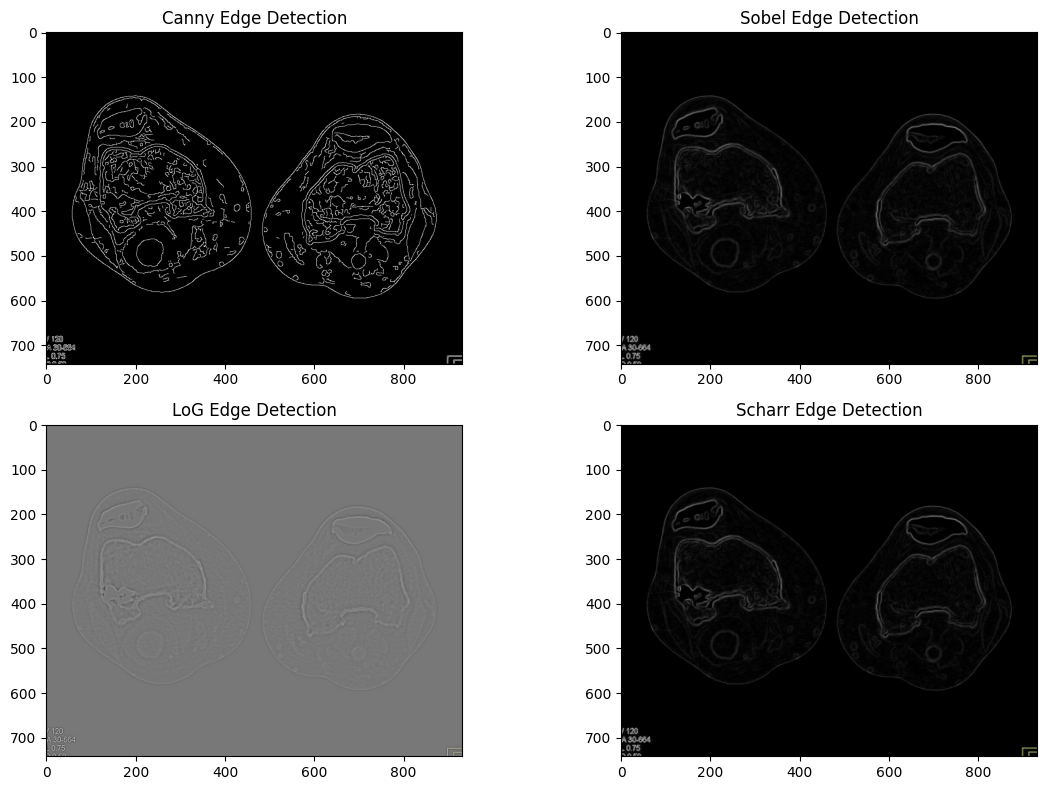

In [53]:
# Display the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1), plt.imshow(canny_edges, cmap='gray'), plt.title("Canny Edge Detection")
plt.subplot(2, 2, 2), plt.imshow(sobel_edges, cmap='gray'), plt.title("Sobel Edge Detection")
plt.subplot(2, 2, 3), plt.imshow(log_edges, cmap='gray'), plt.title("LoG Edge Detection")
plt.subplot(2, 2, 4), plt.imshow(scharr_edges, cmap='gray'), plt.title("Scharr Edge Detection")
plt.tight_layout()
plt.show()

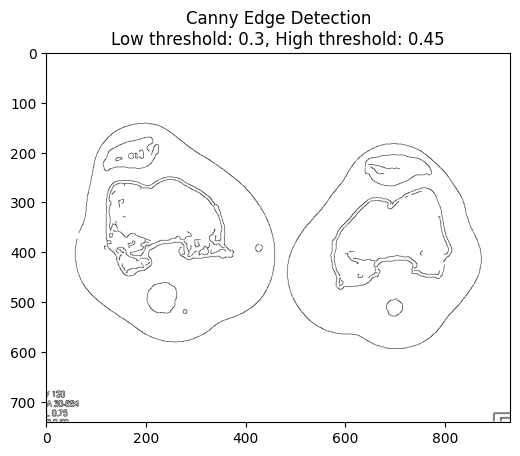

In [32]:
# Canny Edge Detection Animation
fig, ax = plt.subplots()
im = ax.imshow(image, cmap='binary', vmin=0, vmax=1)

low_threshold_range = np.linspace(0.01, 0.3, 100)
high_threshold_factor = 1.5

def update_frame_canny_low_threshold(frame_idx):
    low_threshold = low_threshold_range[frame_idx]
    high_threshold = high_threshold_factor * low_threshold
    rounded_low_threshold = round_sig(low_threshold, 3)
    rounded_high_threshold = round_sig(high_threshold, 3)
    edges = canny_edge_detection(image, sigma=1, low_threshold=low_threshold, high_threshold=high_threshold)
    im.set_data(edges)
    ax.set_title(f"Canny Edge Detection\nLow threshold: {rounded_low_threshold}, High threshold: {rounded_high_threshold}")
    return [im]

num_frames = len(low_threshold_range)
ani_canny_low_threshold = animation.FuncAnimation(fig, update_frame_canny_low_threshold, frames=num_frames, blit=True, interval=(2000 // num_frames))

rc('animation', writer='pillow')
ani_canny_low_threshold.save(str(EDGE_DETECTION_DIR / "canny_low_threshold.gif"), writer='pillow', fps=(num_frames // 2))

In [60]:
sigma_range = np.linspace(0.1, 5.0, 100)

def update_frame_canny_sigma(frame_idx):
    sigma = sigma_range[frame_idx]
    edges = canny_edge_detection(image, sigma=sigma)
    im.set_data(edges)
    ax.set_title(f"Canny Edge Detection Animation (Varying sigma)\nsigma = {round_sig(sigma, sig=2)}")
    return [im]

num_frames = len(sigma_range)
ani_canny_sigma = animation.FuncAnimation(fig, update_frame_canny_sigma, frames=num_frames, blit=True, interval=(2000 // num_frames))

rc('animation', writer='pillow')
ani_canny_sigma.save(str(EDGE_DETECTION_DIR / "canny_sigma.gif"), writer='pillow', fps=(num_frames // 2))

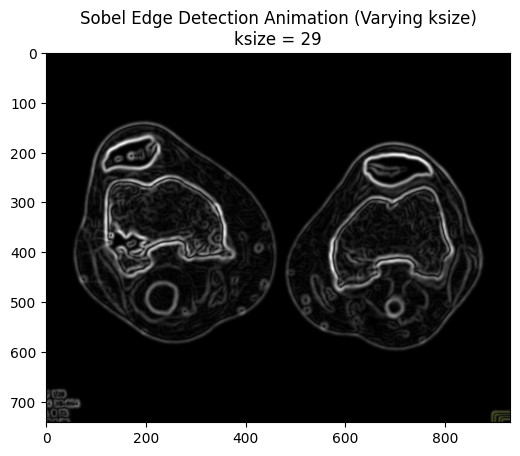

In [61]:
# Sobel Edge Detection Animation
fig, ax = plt.subplots()
im = ax.imshow(image, cmap='gray', vmin=0, vmax=255)

ksize_range = np.arange(3, 30, 2)

def update_frame_sobel_ksize(frame_idx):
    ksize = ksize_range[frame_idx]
    edges = sobel_edge_detection(image, ksize=ksize)
    im.set_data(edges)
    ax.set_title(f"Sobel Edge Detection Animation (Varying ksize)\nksize = {ksize}")
    return [im]

num_frames = len(ksize_range)
ani_sobel_ksize = animation.FuncAnimation(fig, update_frame_sobel_ksize, frames=num_frames, blit=True, interval=(2000 // num_frames))

rc('animation', writer='pillow')
ani_sobel_ksize.save(str(EDGE_DETECTION_DIR / "sobel_ksize.gif"), writer='pillow', fps=(num_frames//2))

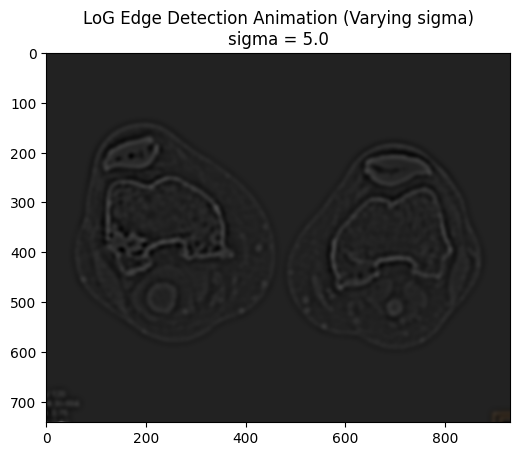

In [33]:
# LoG Edge Detection Animation
fig, ax = plt.subplots()
im = ax.imshow(image, cmap='gray', vmin=0, vmax=255)

sigma_range = np.linspace(0.1, 5.0, 100)

def update_frame_log_sigma(frame_idx):
    sigma = sigma_range[frame_idx]
    rounded_sigma = round_sig(sigma, sig=2)
    edges = log_edge_detection(image, sigma=sigma)
    im.set_data(edges)
    ax.set_title(f"LoG Edge Detection Animation (Varying sigma)\nsigma = {rounded_sigma}")
    return [im]

num_frames = len(sigma_range)
ani_log_sigma = animation.FuncAnimation(fig, update_frame_log_sigma, frames=num_frames, blit=True, interval=(2000 // num_frames))

rc('animation', writer='pillow')
ani_log_sigma.save(str(EDGE_DETECTION_DIR / "log_sigma.gif"), writer='pillow', fps=(num_frames // 2))